## Detect objects by contouring

In [1]:
import cv2 as cv
import copy
from matplotlib import pyplot as plt
import numpy as np
from PIL import Image 
from scipy.signal import convolve2d

In [2]:
img_path = './converted/101965655_conv.jpeg'
img_orig = cv.imread(img_path)

### Resize, smooth

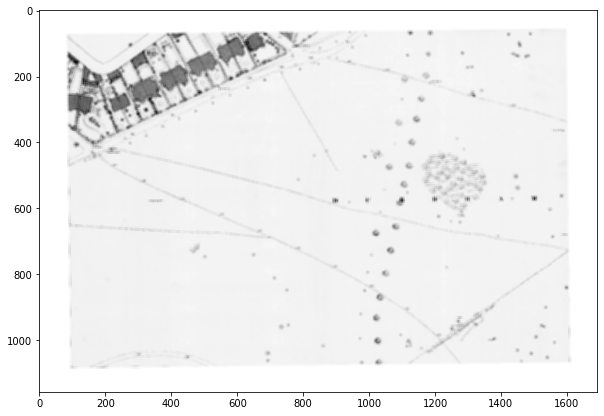

In [3]:
img_resize = cv.resize(src=img_orig, dsize=None, fx=0.1, fy=0.1)
imgray = cv.cvtColor(img_resize,cv.COLOR_BGR2GRAY)

kernel_dim = 10
kernel = np.ones((kernel_dim,kernel_dim),np.float32)/(kernel_dim*kernel_dim)
img = cv.filter2D(imgray,-1,kernel)

plt.figure(figsize=(10, 10))
plt.imshow(img,cmap="Greys_r")
#blur_kernel = np.array([[0,1,0],[1,0,1],[0,1,0]])
#img = convolve2d(imgray,blur_kernel,mode='valid')

### Thresholding (remove gray background)

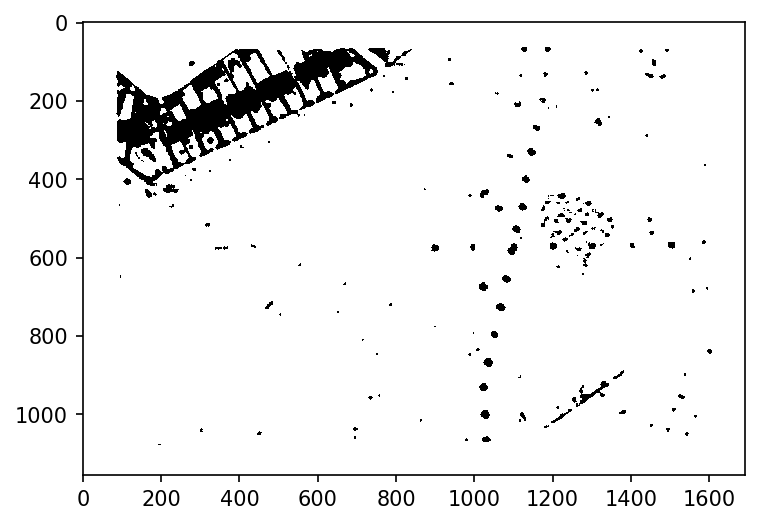

In [4]:
ret,thresh = cv.threshold(img,0,255,cv.THRESH_BINARY+cv.THRESH_OTSU)
plt.figure(dpi=150)
plt.imshow(thresh,cmap='Greys_r')

In [5]:
#canny = cv.Canny(img,0, 255)
#plt.figure(dpi=200)
#plt.imshow(canny,cmap="Greys")

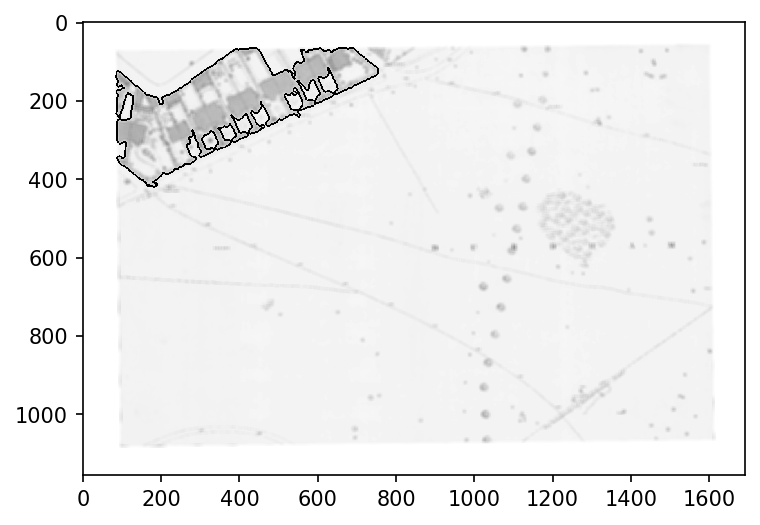

In [6]:
contours, hierarchy = cv.findContours(thresh,cv.RETR_TREE,cv.CHAIN_APPROX_SIMPLE)
contours.sort(key=cv.contourArea,reverse=True)
plt.figure(dpi=150)
x = cv.drawContours(img, [contours[1]], 0, (0,255,0), 3)
plt.imshow(x, cmap='gray')
#plt.imshow(img, cmap='gray')

### Area of detected contours

(0, 3000)

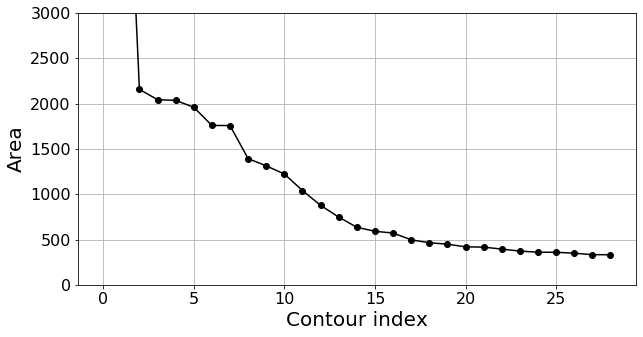

In [25]:
contour_area = []
for i in range(0, len(contours)):
    contour_area.append(cv.contourArea(contours[i]))
contour_area = np.array(contour_area)

plt.figure(figsize=(10, 5))
plt.plot(contour_area[1:30], c='k', marker='o')
plt.grid()
plt.xlabel("Contour index", size=20)
plt.ylabel("Area", size=20)
plt.xticks(size=16)
plt.yticks(size=16)
plt.ylim(0, 3000)

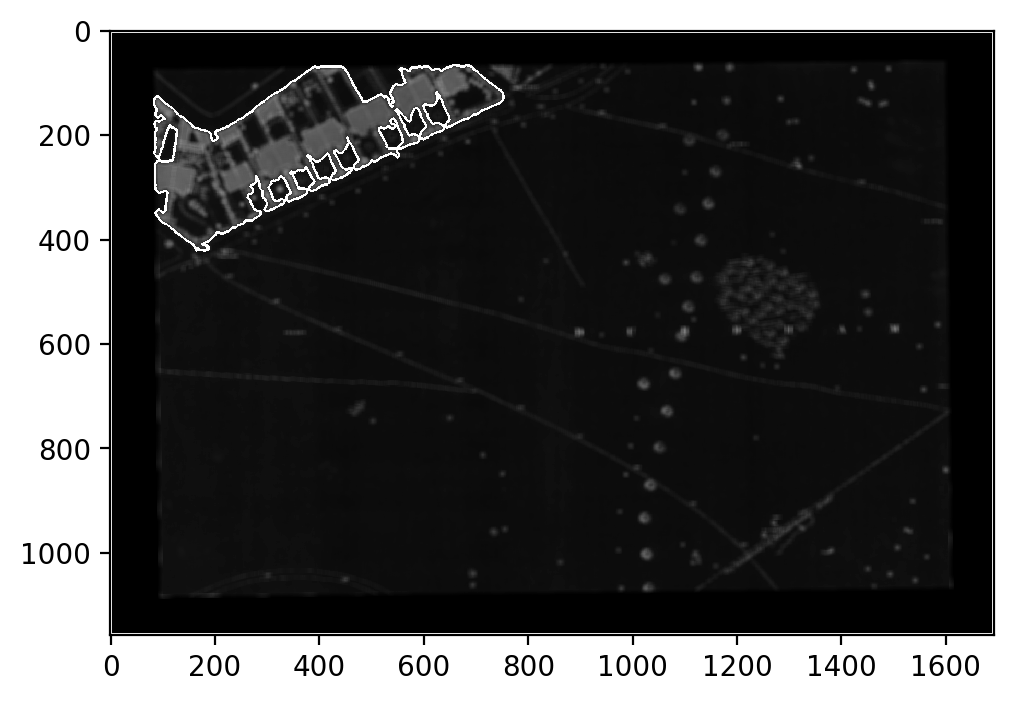

In [8]:
cv.contourArea(contours[3])
plt.figure(dpi=200)

x = cv.drawContours(img, [contours[0]], 0, (0,255,0), 3)
plt.imshow(x, cmap='Greys')

## Histogram

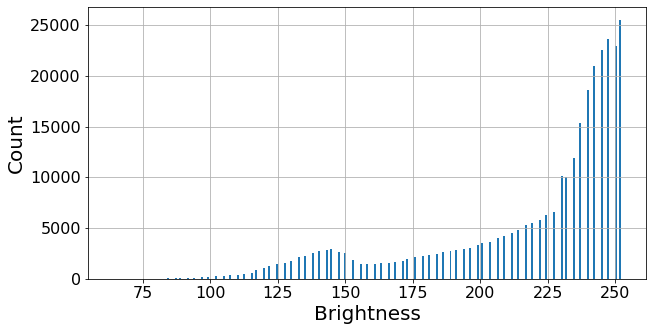

In [9]:
max_threshold = 200

gray_img_filt = imgray.copy()

gray_img_filt[gray_img_filt < max_threshold] = 0
gray_img_filt[gray_img_filt >= max_threshold] = 255

kernel_dim = 10
kernel = np.ones((kernel_dim,kernel_dim),np.float32)/(kernel_dim*kernel_dim)
dst_orig = cv.filter2D(gray_img_filt,-1,kernel)
dst1 = dst_orig.copy()

plt.figure(figsize=(10, 5))
dst_orig = dst1[dst1 <= 254] 
plt.hist(dst_orig, bins=255)
plt.grid()
plt.xlabel("Brightness", size=20)
plt.ylabel("Count", size=20)
plt.xticks(size=16)
plt.yticks(size=16)

plt.show()

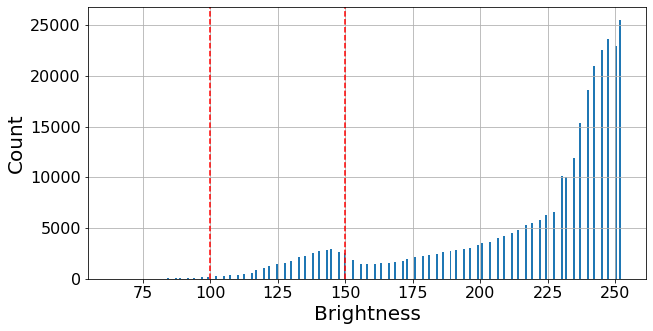

In [10]:
max_threshold = 200
min_brightness2filter = 100
max_brightness2filter = 150

gray_img_filt = imgray.copy()

gray_img_filt[gray_img_filt < max_threshold] = 0
gray_img_filt[gray_img_filt >= max_threshold] = 255

kernel_dim = 10
kernel = np.ones((kernel_dim,kernel_dim),np.float32)/(kernel_dim*kernel_dim)
dst_orig = cv.filter2D(gray_img_filt,-1,kernel)
dst1 = dst_orig.copy()

plt.figure(figsize=(10, 5))
dst_orig = dst1[dst1 <= 254] 
plt.hist(dst_orig, bins=255)
plt.grid()
plt.xlabel("Brightness", size=20)
plt.ylabel("Count", size=20)
plt.xticks(size=16)
plt.yticks(size=16)
plt.axvline(min_brightness2filter, c='r', ls='--')
plt.axvline(max_brightness2filter, c='r', ls='--')

plt.show()

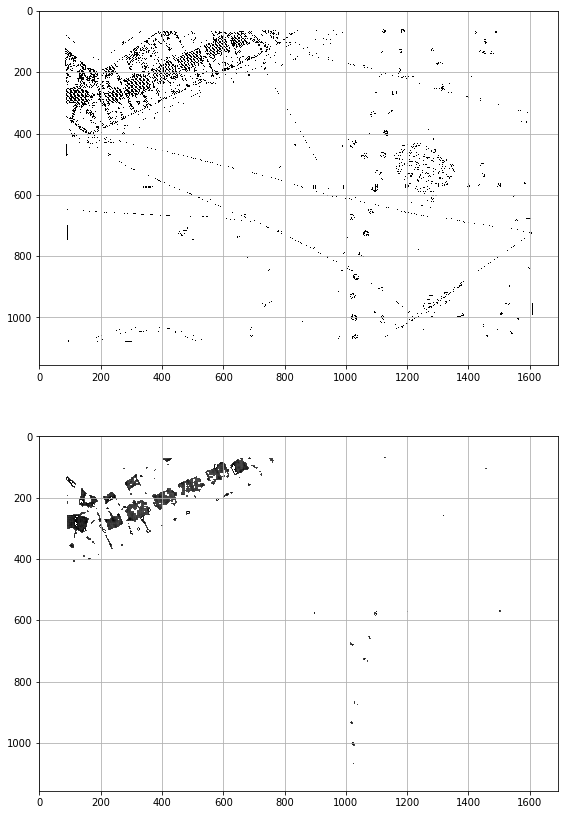

In [11]:
plt.figure(figsize=(40, 30))
plt.subplot(4, 1, 1)
plt.imshow(gray_img_filt, cmap='gray')
plt.grid()

dst1[dst1 >= max_brightness2filter] = 255
dst1[dst1 <= min_brightness2filter] = 255

plt.subplot(4, 1, 2)
plt.imshow(dst1, cmap='gray')
plt.grid()
plt.show()

In [12]:
# percentage of black pixels
np.size(dst1[dst1 < 200]) / np.size(dst1)*100

1.447722356686565